## EDA
- Train Dataset: 12,408건
- Test Dataset: 1380건
- 이미지의 크기: 1920x1080x4(png) 파일
- 주의 할 점: 한 이미지 내에 다양한 클래스가 포함 (max: 5)
- 총 label 값: 9가지
- ```all_dict```
    - key: 한 이미지의 json 파일
    - value: class 값

In [1]:
train_data = '/mnt/dataset/train-valid_set'
inference_data = '/mnt/dataset/test_set'

In [2]:
import os
file_list = os.listdir(train_data)

In [3]:
file_list # 9개

['Suction Irrigator (SIRL-UCUK)',
 'R-Scissors (da Vinci) (MSCR-UCDV)',
 'Needle Holder (AESCULAP) (NDHL-UCAE)',
 'Graspers (straight) (OLYMPUS) (GRSL-UCOL)',
 'Metal Clip Applier (Medtronic) (CLAL-M3MT)',
 'R-Maryland (da Vinci) (BFCR-MADV)',
 'R-LND (da Vinci) (NDDR-LADV)',
 'Prograsp (da Vinci) (GRSR-UCDV)',
 'Polymer Clip Applier (CLAL-UCUK)']

In [4]:
class_list = ['Prograsp (da Vinci) (GRSR-UCDV)',
              'R-LND (da Vinci) (NDDR-LADV)',
              'R-Maryland (da Vinci) (BFCR-MADV)',
              'R-Scissors (da Vinci) (MSCR-UCDV)',
              'Suction Irrigator (SIRL-UCUK)',
              'Graspers (straight) (OLYMPUS) (GRSL-UCOL)',
              'Needle Holder (AESCULAP) (NDHL-UCAE)',
              'Metal Clip Applier (Medtronic) (CLAL-M3MT)',
              'Polymer Clip Applier (CLAL-UCUK)'
             ]

In [5]:
import os
data = os.listdir(train_data+'/'+file_list[0])
data.sort()
temp_data = data[:3] #한 사진에 json, png, xml 존재
temp_data, len(data)

(['GGHB_DC16_LWK0_LDG0_0015_0169548.json',
  'GGHB_DC16_LWK0_LDG0_0015_0169548.png',
  'GGHB_DC16_LWK0_LDG0_0015_0169548.xml'],
 4440)

In [6]:
# 주의!!!!!
# 수술도구마다 폴더가 나뉘어져 있어서 폴더내에서 접근하면 하나의 세그멘테이션만 가능.

# 그런데 하나의 사진에 여러 수술도구가 있음.

# 아래의 코드에서는
# Suction Irrigator (SIRL-UCUK),
# R-Scissors (da Vinci) (MSCR-UCDV)
# 위 두가지 도구가 같이 나오는 사진이 (306/3)=102장 인거임!!!

data2 = os.listdir(train_data+'/'+file_list[1])
len(list(set(data2).intersection(data)))

306

In [7]:
json_path = train_data+'/'+file_list[0]+'/'+temp_data[0]
xml_path = train_data+'/'+file_list[0]+'/'+temp_data[2]

In [8]:
#xml 파일 보기

def viewXML(xml_path):
    import xml.etree.ElementTree as elemTree

    tree = elemTree.parse(xml_path)
    root = tree.getroot()

    for child in root:
        print(child.tag, '   \t', child.text)
        for rechild in child:
            print('\t', rechild.tag+'\t', rechild.text)
            for points in rechild:
                print('\t\t', points.tag, points.text)
                
viewXML(xml_path)

folder    	 C:\Users\user\Desktop\0811~ 일\1111\Suction Irrigator (SIRL-UCUK)
filename    	 GGHB_DC16_LWK0_LDG0_0015_0169548.xml
path    	 C:\Users\user\Desktop\0811~ 일\1111\Suction Irrigator (SIRL-UCUK)
size    	 
    
	 width	 1920
	 height	 1080
	 depth	 3
object    	 
    
	 name	 Suction Irrigator (SIRL-UCUK)
	 id	 480
	 type	 poly
	 clr	 #8B6331
	 points	 
      
		 x 721.528662420382
		 y 566.296618233252
		 x 755.15923566879
		 y 570.879362221937
		 x 767.388535031847
		 y 580.044850199306
		 x 799.490445859873
		 y 592.265500835798
		 x 818.051881164882
		 y 605.577677767776
		 x 831.809842948321
		 y 628.491397711199
		 x 839.453155050232
		 y 650.533007586473
		 x 840.545280300412
		 y 677.810055291244
		 x 840.108743130212
		 y 703.77893789379
		 x 830.063694267516
		 y 738.474476019031
		 x 737.689925613962
		 y 800.449839269642
		 x 649.68152866242
		 y 855.009489520381
		 x 608.407643312102
		 y 893.199022759419
		 x 538.089171974522
		 y 946.664369294073
		 x 484.5859872

In [9]:
#json 파일 보기. 이거만 보면 될듯?!

import json

def getjson(json_path):
    with open(json_path) as json_file:
        json_data = json.load(json_file)
    return json_data

def viewjson(json_data):
    print(json.dumps(json_data, indent=4))
    
viewjson(getjson(json_path))

{
    "images": {
        "id": "GGHB_DC16_LWK0_LDG0_0015_0169548.png",
        "width": 1920,
        "height": 1080,
        "filename": "GGHB_DC16_LWK0_LDG0_0015_0169548.png",
        "date_created": "2021-11-11 18:06:35"
    },
    "metas": {
        "id": "\uc218\uc220\ub3c4\uad6c_\uc99d\ub840\uae30\ub85d\uc9c0_Suction Irrigator (SIRL-UCUK).xlsx",
        "operation": "LDG",
        "hospital": "\uac00\ucc9c\ub300\uae38\ubcd1\uc6d0"
    },
    "annotations": [
        {
            "id": "GGHB_DC16_LWK0_LDG0_0015_0169548.json",
            "image_id": "GGHB_DC16_LWK0_LDG0_0015_0169548.png",
            "category_id": 480,
            "category_name": "Suction Irrigator (SIRL-UCUK)",
            "types": "poly",
            "points": [
                [
                    721.528662420382,
                    566.296618233252
                ],
                [
                    755.15923566879,
                    570.879362221937
                ],
                [
         

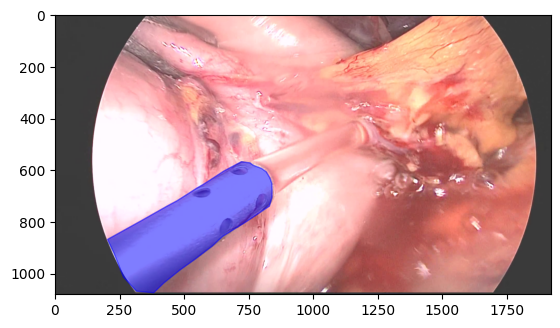

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# json_file을 열어서 어노테이션 입힌 이미지 보기

def viewImage(json_path):
    json_data = getjson(json_path)
    
    image = Image.open(json_path.rpartition('/')[0]+'/'+json_data["images"]["filename"])
    plt.imshow(image)
    color_list = ["blue","yellow","red","green","pink","black"]
    for i in range(len(json_data["annotations"])):
        points = json_data["annotations"][i]["points"].copy()
        points.append(points[0])
        points = np.array(points)
        #plt.plot(points[:,0], points[:,1], linestyle='solid')
        plt.fill(points[:,0], points[:,1], color=color_list[i], alpha=0.5)
    plt.show()
    
viewImage(json_path)

Suction Irrigator (SIRL-UCUK)
GGHB_DC16_LWK0_LDG0_0015_0169548.json


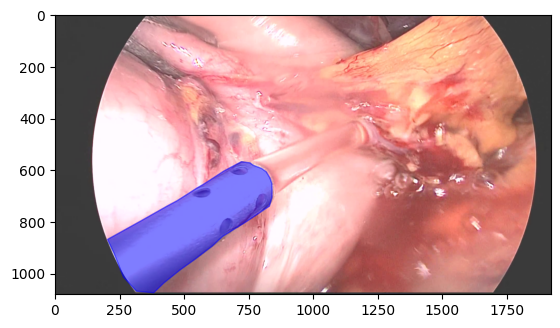

R-Scissors (da Vinci) (MSCR-UCDV)
SNUH_DC07_JCW0_RALP_0000_00005250.json


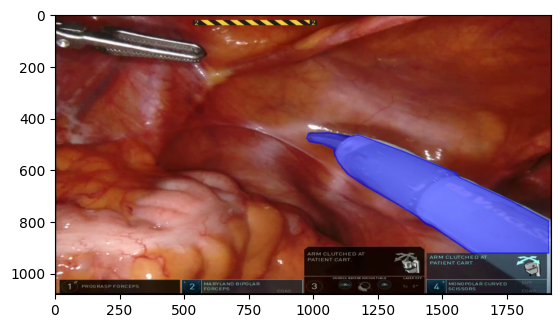

Needle Holder (AESCULAP) (NDHL-UCAE)
SNUH_DC07_JCW0_RALP_0000_00182178.json


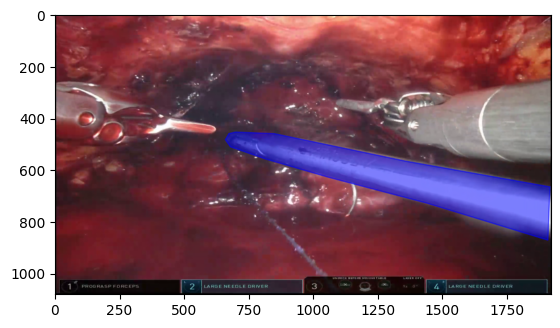

Graspers (straight) (OLYMPUS) (GRSL-UCOL)
SNUH_DC07_JCW0_RALP_0000_00151399.json


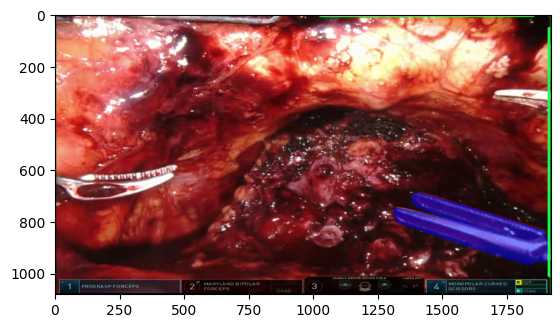

Metal Clip Applier (Medtronic) (CLAL-M3MT)
SNUH_DC07_JCW0_RALP_0001_00046340.json


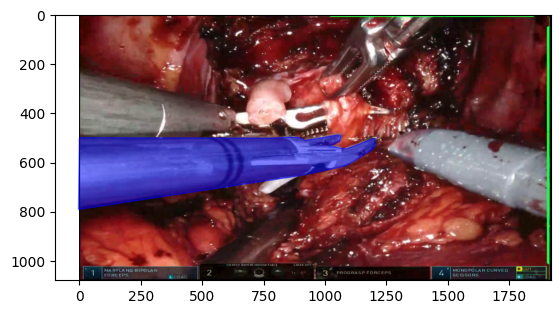

R-Maryland (da Vinci) (BFCR-MADV)
SNUH_DC07_JCW0_RALP_0000_00004758.json


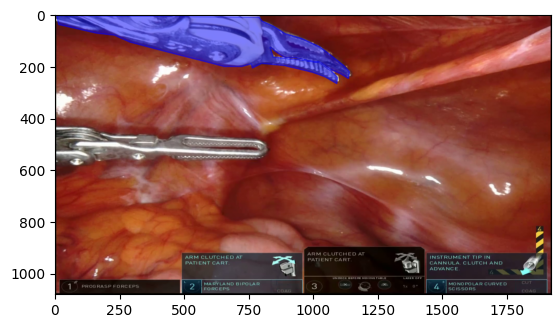

R-LND (da Vinci) (NDDR-LADV)
SNUH_DC07_JCW0_RALP_0000_00181898.json


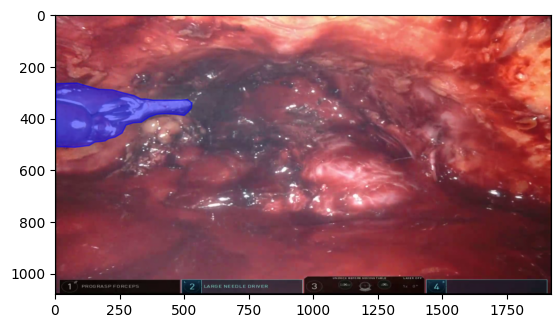

Prograsp (da Vinci) (GRSR-UCDV)
GGHB_DC68_LJH0_BABA_0002_0000060.json


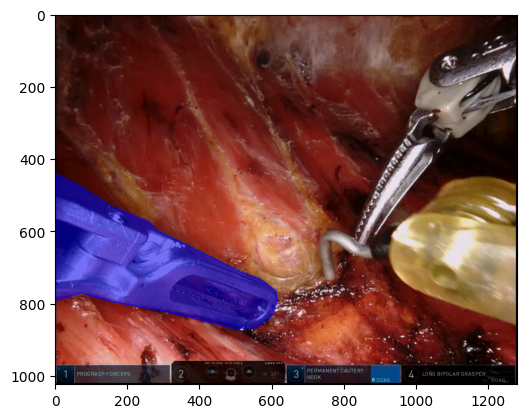

Polymer Clip Applier (CLAL-UCUK)
SNUH_DC07_JCW0_RALP_0001_00044763.json


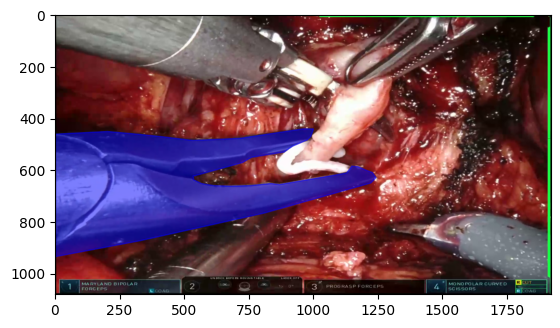

In [11]:
# 수술도구마다 하나씩 보기!

for tool in file_list:
    print(tool)
    data = os.listdir(train_data+'/'+tool)
    data.sort()

    for file_name in data:
        if(file_name[-4:] == 'json'):
            print(file_name)
            json_path = train_data+'/'+tool+'/'+file_name
            viewImage(json_path)
            break

In [12]:
# 근데 이미지 하나당 수술도구 하나씩 나오니까
# 처음부터 데이터를 전부 읽어와서 리스트 하나로 만들어봤어

# all_data 는 모든 json file 리스트
# data_dic 는 key 값이 수술도구, value가 json file인 딕셔너리

all_data = []
data_dic = {}

for tool in file_list:
    files = os.listdir(train_data+'/'+tool)
    json_files = [file for file in files if file.endswith(".json")]
    
    all_data.extend(json_files)
    data_dic[tool] = json_files

len(all_data) # 모든 json file은 12408개

12408

In [13]:
# 중복을 제거하니, 수술도구가 여러개 있는 사진이 2천장정도 있음

all_data = list(set(all_data))
len(all_data)

10792

In [14]:
# all_dic 은 key 값은 사진, value값은 수술도구인 딕셔너리.
# 만들기 어려웠음! #수고했음!
# 이렇게 하면 사진 하나에서 여러 어노테이션을 동시에 볼 수 있음.

all_dic = {}
        
for files in all_data:
    for i in data_dic:
        if(files in data_dic[i]):
            if(files in all_dic):
                temp = all_dic[files]
                temp.append(i)
                all_dic[files] = temp
            else:
                all_dic[files] = [i]
all_dic

{'SNUH_DC16_KSH0_LDG0_0050_00292440.json': ['Needle Holder (AESCULAP) (NDHL-UCAE)'],
 'SNUH_DC08_KHS0_ENME_0039_00064081.json': ['R-Scissors (da Vinci) (MSCR-UCDV)'],
 'SNUH_DC16_KMJ0_RHC0_0001_00067272.json': ['Metal Clip Applier (Medtronic) (CLAL-M3MT)'],
 'SNUH_DC07_JCW0_RALP_0031_00041643.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0021_00131778.json': ['Polymer Clip Applier (CLAL-UCUK)'],
 'SNUH_DC07_JCW0_RLPN_0009_0010499.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0011_00038969.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0011_0069255.json': ['R-Scissors (da Vinci) (MSCR-UCDV)',
  'Graspers (straight) (OLYMPUS) (GRSL-UCOL)',
  'R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0001_00012091.json': ['Graspers (straight) (OLYMPUS) (GRSL-UCOL)'],
 'SNUH_DC08_KHS0_ENME_0016_00026322.json': ['Suction Irrigator (SIRL-UCUK)'],
 'SNUH_DC07_JCW0_RALP_0001_0015934.json': ['Suction Irrigator (SIRL-UCUK)',
  'R-

In [15]:
data_filenames = list(all_dic.keys())
data_filenames.sort()

In [16]:
len(data_filenames)

10792

In [17]:
maximum = 0
for i in all_dic:
    if maximum < len(all_dic[i]):
        maximum = len(all_dic[i])
maximum

5

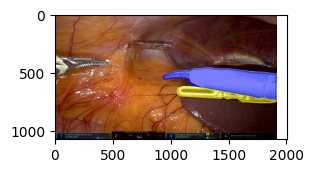

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
    
# image_file을 열어서 어노테이션 입힌 여러 이미지 보기
    
def plotImage(json_file):
    tools = all_dic[json_file]
    image_path = train_data+'/'+tools[0]+'/'+json_file.rpartition('.')[0]+'.png'
    
    image = Image.open(image_path)
    plt.figure(figsize=(3, 2))
    plt.imshow(image)
    color_list = ["blue","yellow","red","green","pink"]
    
    for tool in range(len(tools)):
        json_path = train_data+'/'+tools[tool]+'/'+json_file
        json_data = getjson(json_path)
    
        for i in range(len(json_data["annotations"])):
            points = json_data["annotations"][i]["points"].copy()
            points.append(points[0])
            points = np.array(points)
            #plt.plot(points[:,0], points[:,1], linestyle='solid')
            plt.fill(points[:,0], points[:,1], color=color_list[tool], alpha=0.5)
    plt.show()
    
    
plotImage('SNUH_DC07_JCW0_RLPN_0008_0023168.json')

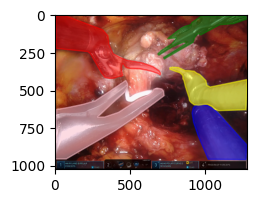

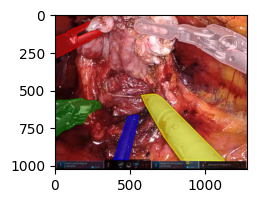

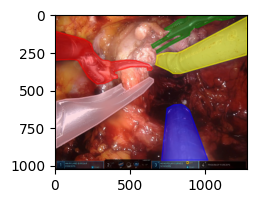

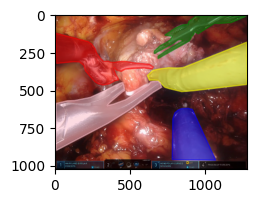

In [19]:
#어노테이션 제일 많은(5개)인 애들 시각화.

for i in all_dic:
    if maximum == len(all_dic[i]):
        plotImage(i)

## y label masking

In [20]:
from PIL import Image, ImageDraw

def getData(file):
    tools = all_dic[file]

    json_path = train_data + '/' + tools[0] + '/' + file
    json_data = getjson(json_path)
    width = json_data['images']['width']
    height = json_data['images']['height']
    
    image_path = train_data+'/'+tools[0]+'/'+ file.rpartition('.')[0]+'.png'
#    image = np.array(Image.open(image_path))
    
#    file_name = json_data['images']['filename'].rpartition('.')[0]
    mask = np.zeros((height,width,9))
    for tool in tools:
        class_num = class_list.index(tool)
        json_path = train_data + '/' + tool + '/' + file
        json_data = getjson(json_path)
        for classes in class_list:
            for json_seg in json_data['annotations']:
                if(classes == json_seg['category_name']):
                    found = True
                    points = json_seg["points"].copy()
                    points = [(x[0],x[1]) for x in points]
                    img = Image.new('L', (width, height), 0)
                    ImageDraw.Draw(img).polygon(points, outline=1, fill=1)
                    mask[:,:,class_num] = np.array(img)
    return image_path, mask

In [21]:
for i in all_dic:
    x = getData(i)
    break

SNUH_DC16_KSH0_LDG0_0050_00292440.json


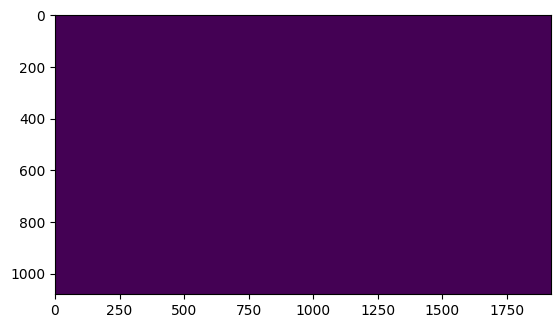

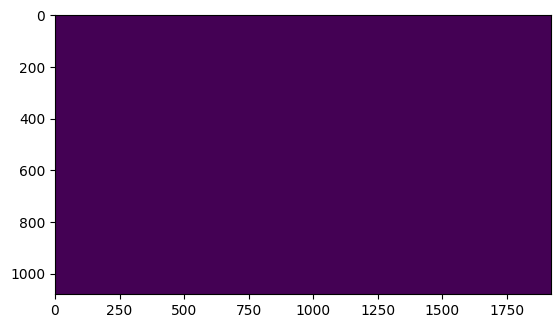

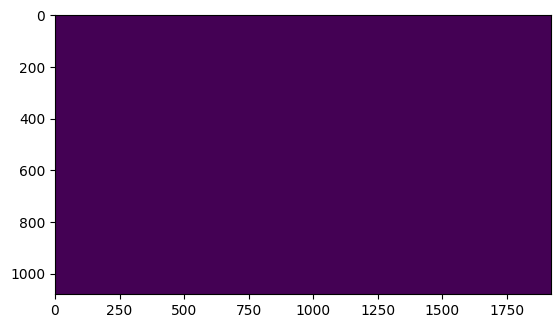

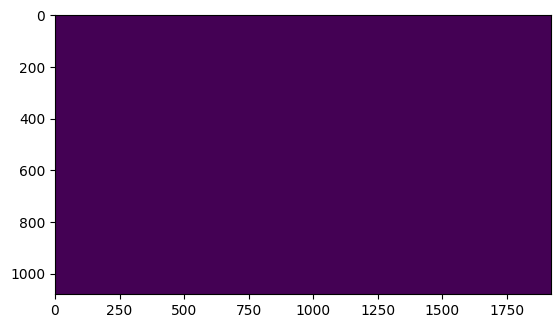

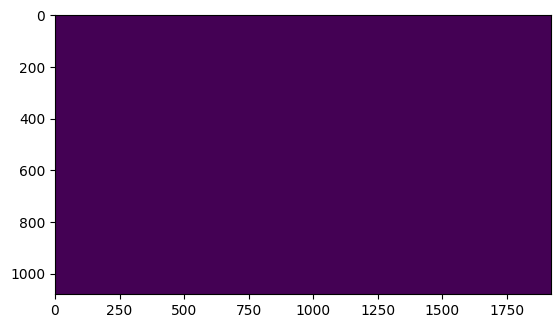

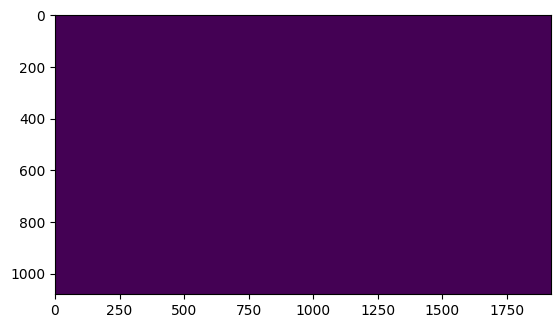

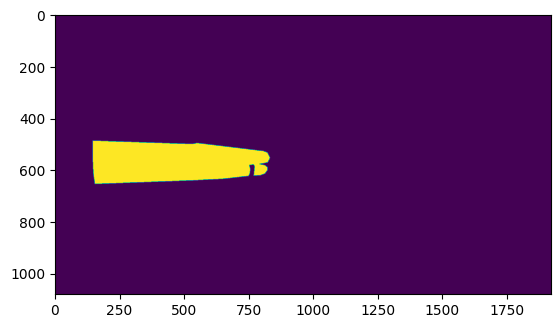

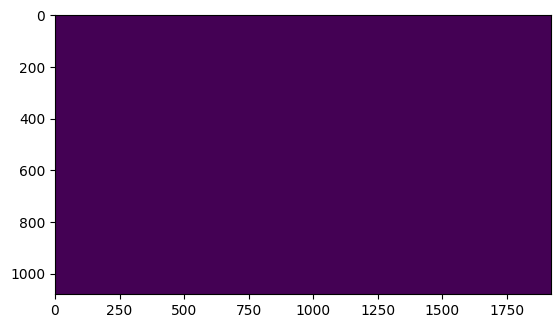

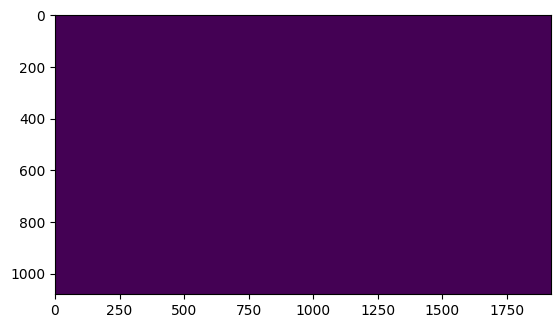

In [22]:
# y label 만들기

import numpy as np

for file in all_dic:
    image, mask = getData(file)
#    with open('labels/'+file_name, 'wb') as f:
#        np.save(f, mask)
    print(file)
    for i in range(9):
        plt.imshow(mask[:,:,i])
        plt.show()
    break
        

# DataLoader

In [23]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa

In [24]:
'''
wset = set()
itr = 0
for i in train_filenames:
    wset.add((getData(i)[0].shape[0], getData(i)[0].shape[1]))
    if(len(wset) != itr):
        itr = len(wset)
        print(wset)
print(wset)
'''

'\nwset = set()\nitr = 0\nfor i in train_filenames:\n    wset.add((getData(i)[0].shape[0], getData(i)[0].shape[1]))\n    if(len(wset) != itr):\n        itr = len(wset)\n        print(wset)\nprint(wset)\n'

In [25]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
    """This fn will perform the horizontal or vertical shift"""
    if width_shift_range or height_shift_range:
        if width_shift_range:
            width_shift_range = tf.random.uniform([],  
                                                  -width_shift_range * img_shape[1],
                                                  width_shift_range * img_shape[1])
        if height_shift_range:
            height_shift_range = tf.random.uniform([],
                                                   -height_shift_range * img_shape[0],
                                                   height_shift_range * img_shape[0])
        output_img = tfa.image.translate(output_img,
                                         [width_shift_range, height_shift_range])
        label_img = tfa.image.translate(label_img,
                                        [width_shift_range, height_shift_range])
    return output_img, label_img

In [26]:
def flip_img(horizontal_flip, vertically_flip, tr_img, label_img):
    if horizontal_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)), 
                                lambda: (tr_img, label_img))
    if vertically_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_up_down(tr_img), tf.image.flip_up_down(label_img)), 
                                lambda: (tr_img, label_img))
    return tr_img, label_img

In [27]:
def _augment(img,
             label_img,
             resize=None,    # Resize the image to some size e.g. [256, 256]
             scale=1,    # Scale image e.g. 1 / 255.
             hue_delta=0.01,    # Adjust the hue of an RGB image by random factor
             horizontal_flip=True,    # Random left right flip,
             vertically_flip=True,    # Random up down flip,
             width_shift_range=.1,    # Randomly translate the image horizontally
             height_shift_range=.1):    # Randomly translate the image vertically
    
    if resize is not None:
        # Resize both images
        label_img = tf.image.resize(label_img, resize)
        img = tf.image.resize(img, resize)
    
    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)
    
    img, label_img = flip_img(horizontal_flip, vertically_flip, img, label_img)                               
    img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
    label_img = tf.cast(label_img, dtype=tf.float32) * scale
    img = tf.cast(img, dtype=tf.float32) * scale
    return img, label_img

In [28]:
data_filenames = list(all_dic.keys())
data_filenames.sort()

In [29]:
def _process_pathnames(filename):
    # We map this function onto each pathname pair
    fname, labels = getData(filename)
    
    img_str = tf.io.read_file(fname)
    img = tf.image.decode_png(img_str, channels=3) # RGB
    
    label_img = tf.convert_to_tensor(labels)
    width = tf.cast(label_img.shape[0], dtype=tf.uint16)
    height = tf.cast(label_img.shape[1], dtype=tf.uint16)
    
    resize = [288, 512]
    img = tf.image.resize(img, resize)
    label_img = tf.image.resize(label_img, resize)
    
    label_cls = tf.reduce_sum(label_img,[0,1])>0
    label_cls = tf.cast(label_cls, dtype=tf.float32)
    
    scale = 1 / 255.                
    img = tf.cast(img, dtype=tf.float32) * scale
    filename = tf.cast(filename, dtype=tf.string)
    
    return filename, width, height, img, label_img, label_cls

In [30]:
#dataset = list(map(_process_pathnames, data_filenames[i]))
#X_train = np.array([x for (x, y) in dataset])
#y_train = np.array([y for (x, y) in dataset])
#print(X_train.shape)

In [31]:
val_ratio = 0.2
seed = 1234
    
train_filenames, test_filenames = train_test_split(data_filenames,
                                                   test_size=val_ratio,
                                                   random_state=seed,
                                                  )

num_train_examples = len(train_filenames)
num_test_examples = len(test_filenames)

In [32]:
import functools
    
img_shape = (288, 512, 3)
    
batch_size = 16
max_epochs = 20
    
def gen_train():
    for i in train_filenames:
        yield _process_pathnames(i)
    
def gen_test():
    for i in test_filenames:
        yield _process_pathnames(i)
    
def get_dataset(#data,
                 preproc_fn = functools.partial(_augment),
                 threads = 6,
                 batch_size = batch_size,
                 is_train = True):
    
    if is_train:
        dataset = tf.data.Dataset.from_generator(gen_train, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,9), (9)))
    else:
        dataset = tf.data.Dataset.from_generator(gen_test, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,9), (9)))
    
    if is_train:
        dataset = dataset.shuffle(buffer_size=400)
    dataset = dataset.batch(batch_size)

#    train_dataset, test_dataset = train_test_split(dataset,
#                                                       test_size=val_ratio,
#                                                       random_state=seed,
#                                                      )
    # Map our preprocessing function to every element in our dataset, taking
    # advantage of multithreading
    #dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)
    
#    if is_train:
        #if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        #  assert batch_size == 1, "Batching images must be of the same size"
#        dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
#        dataset = dataset.shuffle(num_x * 10)
        
    return dataset

In [33]:
train_dataset = get_dataset(is_train=True)
test_dataset = get_dataset(is_train=False)

In [34]:
print(train_dataset)

<BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 9), (None, 9)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>


In [35]:
'''
for images, labels in train_dataset.take(1):
    # Running next element in our graph will produce a batch of images
    print(images.shape)
    img = images[0]
    
    plt.figure(figsize=(4,3))
    plt.subplot(1, 1, 1)
    plt.imshow(img)
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(labels[0, :, :, i])
    plt.show()
'''

'\nfor images, labels in train_dataset.take(1):\n    # Running next element in our graph will produce a batch of images\n    print(images.shape)\n    img = images[0]\n    \n    plt.figure(figsize=(4,3))\n    plt.subplot(1, 1, 1)\n    plt.imshow(img)\n    plt.show()\n    \n    plt.figure(figsize=(8,6))\n    for i in range(9):\n        plt.subplot(3, 3, i+1)\n        plt.imshow(labels[0, :, :, i])\n    plt.show()\n'

In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses

In [40]:
class Conv(tf.keras.layers.Layer):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        self.conv = layers.Conv2D(num_filters, kernel_size, padding='same')
        self.bn = layers.BatchNormalization()

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = layers.ReLU()(x)

        return x

In [41]:
class ConvBlock(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(ConvBlock, self).__init__()
        self.conv1 = Conv(num_filters, 3)
        self.conv2 = Conv(num_filters, 3)

    def call(self, inputs):
        conv_block = self.conv1(inputs)
        conv_block = self.conv2(conv_block)

        return conv_block

class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(EncoderBlock, self).__init__()
        self.conv_block = ConvBlock(num_filters)
        self.encoder_pool = layers.Conv2D(num_filters, 3, padding='same', strides=2, activation='relu')
        # layers.MaxPool2D((2,2))

    def call(self, inputs):
        encoder = self.conv_block(inputs)
        encoder_pool = self.encoder_pool(encoder)

        return encoder_pool, encoder                                         


class DecoderBlock(tf.keras.layers.Layer):                                         
    def __init__(self, num_filters):
        super(DecoderBlock, self).__init__()
        self.convT = layers.Conv2DTranspose(num_filters, 3, strides=2, padding='same')
        self.bn = layers.BatchNormalization()
        self.conv_block = ConvBlock(num_filters)

    def call(self, input_tensor, concat_tensor):
        decoder = self.convT(input_tensor)
        decoder = self.bn(decoder)
        decoder = layers.ReLU()(decoder)
        decoder = layers.concatenate([decoder,concat_tensor]) # tf.concat([decoder, concat_tensor], -1)
        decoder = self.conv_block(decoder)

        return decoder

In [42]:
class UNet(tf.keras.Model):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder_block1 = EncoderBlock(32)
        self.encoder_block2 = EncoderBlock(64)
        self.encoder_block3 = EncoderBlock(128)
        self.encoder_block4 = EncoderBlock(256)
        
        self.center = ConvBlock(512)
        
        self.flatten = tf.keras.layers.Flatten()
        self.output_linear = tf.keras.layers.Dense(9, activation='sigmoid')
        
        self.decoder_block4 = DecoderBlock(256)
        self.decoder_block3 = DecoderBlock(128)
        self.decoder_block2 = DecoderBlock(64) 
        self.decoder_block1 = DecoderBlock(32) 

        self.output_conv = layers.Conv2D(9, 1, padding='same', activation='sigmoid')

    def call(self, inputs):
        encoder1_pool, encoder1_skip = self.encoder_block1(inputs)
        encoder2_pool, encoder2_skip = self.encoder_block2(encoder1_pool)
        encoder3_pool, encoder3_skip = self.encoder_block3(encoder2_pool)
        encoder4_pool, encoder4_skip = self.encoder_block4(encoder3_pool)
        
        center = self.center(encoder4_pool)
        cls = self.output_linear(self.flatten(center))
        
        decoder4 = self.decoder_block4(center,encoder4_skip)
        decoder3 = self.decoder_block3(decoder4,encoder3_skip)
        decoder2 = self.decoder_block2(decoder3,encoder2_skip)
        decoder1 = self.decoder_block1(decoder2,encoder1_skip)

        outputs = self.output_conv(decoder1)
        
        
        return outputs, cls

In [43]:
model = UNet()

In [44]:
outputs, cls = model(tf.random.normal([batch_size,288,512,3]))
print(outputs.shape, cls.shape)
model.summary()

(16, 288, 512, 9) (16, 9)
Model: "u_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_block (EncoderBlock) multiple                  19648     
_________________________________________________________________
encoder_block_1 (EncoderBloc multiple                  92864     
_________________________________________________________________
encoder_block_2 (EncoderBloc multiple                  370048    
_________________________________________________________________
encoder_block_3 (EncoderBloc multiple                  1477376   
_________________________________________________________________
conv_block_4 (ConvBlock)     multiple                  3544064   
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multip

In [45]:
def dice_coeff(y_true, y_pred): 
    smooth = 1e-10        
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(tf.square(y_true_f)) + \
                                            tf.reduce_sum(tf.square(y_pred_f)) + smooth)

    return score

In [46]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [47]:
def bce_dice_loss(y_true, y_pred):
    loss = tf.reduce_mean(losses.binary_crossentropy(y_true, y_pred)) + \
          dice_loss(y_true, y_pred)

    return loss

In [48]:
bce_loss = tf.keras.losses.BinaryCrossentropy()

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def metric_function(y_true, y_true_cls, y_pred, y_pred_cls, num_classes=2):
    # Flatten  
    
    y_true_cls = tf.cast(tf.round(y_true_cls), dtype=tf.int32)
    y_pred_cls = tf.cast(tf.round(y_pred_cls), dtype=tf.int32)

    y_true_cls = y_true_cls.numpy().reshape(-1)
    y_pred_cls = y_pred_cls.numpy().reshape(-1)

    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    y_true_f = tf.cast(tf.round(y_true_f), dtype=tf.int32).numpy()
    y_pred_f = tf.cast(tf.round(y_pred_f), dtype=tf.int32).numpy()
    
    # calculate confusion matrix
    labels = list(range(num_classes))
    current = confusion_matrix(y_true_f, y_pred_f, labels=labels)
    
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
        
    IoU = intersection / union.astype(np.float32)
    
    sensitivity = []
    specificity = []
    auc_metric = []
    
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_true_cls, y_pred_cls)  
    auc_metric.append(auc(fpr, tpr))

    # calculate confusion matrix
    tn, fp, fn, tp  = confusion_matrix(y_true_cls, y_pred_cls, labels=labels).ravel()
    sensitivity.append(tp/(tp+fn+1e-6))#(tpr)
    specificity.append(tn/(tn+fp+1e-6))#(1-fpr)
    
    sensitivity = np.mean(np.array(sensitivity))
    specificity = np.mean(np.array(specificity))
    auc_metric = np.mean(np.array(auc_metric))
        
    return sensitivity, specificity, auc_metric, np.mean(IoU)



In [50]:
#tf.train.latest_checkpoint(checkpoint_prefix)

In [51]:
optimizer = tf.keras.optimizers.Adam(1e-4)

checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                               model=model)

checkpoint_prefix = '/tf/backup/ckpt/U-Net/'

checkpoint.restore('/tf/backup/ckpt/U-Net/ckpt-3')

In [ ]:
#학습코드
'''
from IPython.display import clear_output
    
# save loss values for plot
loss_history = []
metric_history = []
global_step = 0 # step 수 정의 (선택)
print_count = 10 # tf.gradient_tape
save_epochs = 5 # tf.gradient_tape
batch_step = (num_train_examples // batch_size) + (0 if num_train_examples % batch_size == 0 else 1)
    
for epoch in range(max_epochs):
    for filename, width, height, images, labels, cls in train_dataset: # 데이터 로드 파트
        start_time = time.time()
        global_step = global_step + 1
        
        with tf.GradientTape() as tape: # 모델 학습 파트
            predictions, pred_cls = model(images, training=True) # [batch_size, 256,256,3]
            # [batch_size, 256, 256, 1] - prediction
            loss = bce_dice_loss(labels, predictions) # label [batch_size, 256, 256, 1]
            loss = bce_dice_loss(labels, predictions * tf.reshape(tf.round(pred_cls),[pred_cls.shape[0],1,1,9]))
            loss += bce_loss(cls, pred_cls)
        # 가중치 업데이트 파트
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        # 학습 상태 출력
        epochs = global_step * batch_size / float(num_train_examples)
        duration = time.time() - start_time

        if ((global_step % batch_step) % (batch_step//print_count)) == 0:
            clear_output(wait=True)
    #        examples_per_sec = batch_size  / float(duration)
            print("Epochs: {:.2f} global_step: {} loss: {:.3f} ({:.3f} sec/batch, {:.3f} sec/epoch)".format(
                        epochs, global_step, loss, duration, duration * num_train_examples / float(batch_size)))
            
            loss_history.append([epochs, loss])

            mean = []

            # print sample image                     
            for filename, width, height, test_images, test_labels, test_cls in test_dataset.take(1):
                sample = 0
                print(filename.numpy()[sample].decode('utf-8').rpartition('.')[0]+'.png')
                predictions, pred_cls = model(test_images, training=False)
                
                print('cls :', test_cls.numpy()[sample])
                print('pred :', pred_cls.numpy().round()[sample])
                
                plt.figure(figsize=(4, 3))
                plt.subplot(1, 1, 1)
                plt.imshow(test_images[sample,:,:,:])
                plt.title("Input image")
                plt.show()

                plt.figure(figsize=(8, 6))
                for i in range(9):
                    plt.subplot(3, 3, i+1)
                    plt.imshow(test_labels[sample,:,:,i])
                    plt.title("Actual Mask "+str(i+1))
                plt.show()

                plt.figure(figsize=(8, 6))
                for i in range(9):
                    plt.subplot(3, 3, i+1)
                    plt.imshow(predictions[sample,:,:,i])
                    plt.title("Predicted Mask "+str(i+1))
                plt.show()
                
                plt.figure(figsize=(8, 6))
                for i in range(9):
                    plt.subplot(3, 3, i+1)
                    plt.imshow(tf.round(predictions[sample,:,:,i]) * tf.round(pred_cls[sample,i]))
                    plt.title("Classification Mask "+str(i+1))
                plt.show()
                _, _, _, c_iou = metric_function(test_labels, test_cls, tf.round(predictions) * tf.reshape(tf.round(pred_cls),[pred_cls.shape[0],1,1,9]), pred_cls)
                
                sen, spe, m_auc, iou = metric_function(test_labels, test_cls, predictions, pred_cls)
                mean.append([sen, spe, m_auc, iou, c_iou])
                
            mean = np.array(mean)
            mean = np.mean(mean,axis=0)
            
            metric_history.append([epochs, mean[0], mean[1], mean[2], mean[3], mean[4]])
            
            score = mean[3]*0.6 + (mean[0]*0.1 + mean[1]*0.1 + mean[2]*0.2)
            real_score = mean[4]*0.6 + (mean[0]*0.1 + mean[1]*0.1 + mean[2]*0.2)
            print("metrics: {}".format(mean))
            print("scores : {}".format(score))
            print("real_score : {}".format(real_score))

    # saving (checkpoint) the model periodically
    if (epoch+1) % save_epochs == 0:
        checkpoint.save(checkpoint_prefix)
'''

In [ ]:
#Loss 그래프
'''
loss_history = np.asarray(loss_history)
plt.figure(figsize=(4, 4))
plt.plot(loss_history[:,0], loss_history[:,1])
plt.show()
'''

In [ ]:
#Metric 그래프
'''
metric_history = np.asarray(metric_history)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(metric_history[:,0], metric_history[:,1])
plt.title('sensitivity')

plt.subplot(2, 3, 2)
plt.plot(metric_history[:,0], metric_history[:,2])
plt.title('specificity')

plt.subplot(2, 3, 3)
plt.plot(metric_history[:,0], metric_history[:,3])
plt.title('AUC')

plt.subplot(2, 3, 4)
plt.plot(metric_history[:,0], metric_history[:,4])
plt.title('iou')

plt.subplot(2, 3, 5)
plt.plot(metric_history[:,0], metric_history[:,5])
plt.title('real_iou')

plt.subplot(2, 3, 6)
plt.plot(metric_history[:,0], metric_history[:,5]*0.6 + metric_history[:,1]*0.1 + metric_history[:,2]*0.1 + metric_history[:,3]*0.2)
plt.title('real_score')
plt.show()
'''

In [53]:
import cv2
import pandas as pd

mean = []

# print sample image                     
for dsf, (filename, width, height, images, labels, cls) in enumerate(test_dataset):
    predictions, pred_cls = model(images, training=False)
    
    mask = np.zeros((predictions.shape[0],288,512,9))
    
    for sample in range(predictions.shape[0]):
        
        no_found = True
        for idx, img_cls in enumerate(pred_cls.numpy().round()[sample]):
            sample_label = predictions[sample].numpy().round()[:,:,idx]

            if(img_cls==1 and sample_label.sum()>500):
                #img = tf.image.resize(np.expand_dims(sample_label, axis=-1), [width.numpy()[sample], height.numpy()[sample]])
                #img = img.numpy()
                
                '''
                plt.figure(figsize=(6, 3))
                
                plt.subplot(1, 1, 1)
                plt.imshow(img, cmap='gray')
                plt.title("Input image")
                '''
                img = (sample_label*255).astype(np.uint8)
                
                contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                
                maximum = 0
                maximum_iter = 0
                for i, cnt in enumerate(contours):
                    if(maximum < cv2.contourArea(cnt)):
                        maximum = cv2.contourArea(cnt)
                        maximum_iter = i
                points = contours[maximum_iter]

                for i in range(100):
                    pl = cv2.approxPolyDP(points, (i/100)*cv2.arcLength(points, True), True)
                    if(pl.shape[0]<=10):
                        break
                pl = pl.squeeze()

                for i in range(10-len(pl)):
                    pl = np.concatenate((pl, pl[0].reshape(1,2)), axis=0)
                '''
                plt.plot(pl[:,0],pl[:,1])
                plt.show()
                '''
                pl = [(x[0],x[1]) for x in pl]
                _img = Image.new('L', (512,288), 0)
                ImageDraw.Draw(_img).polygon(pl, outline=1, fill=1)
                mask[sample,:,:,idx] = np.array(_img)#tf.image.resize(np.expand_dims(np.array(_img), axis=-1),[288,512]).numpy().squeeze()
    '''
    print('---------------------')
    print('pred  :', tf.round(pred_cls).numpy()[-1])
    print('class :', cls.numpy()[-1])
    plt.figure(figsize=(18, 4))
    for i in range(9):
        plt.subplot(2, 9, i+1)
        plt.imshow(mask[-1,:,:,i],cmap='gray')
        plt.title("Predicted Mask "+str(i+1))
        
    for i in range(9):
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(labels[-1,:,:,i],cmap='gray')
        plt.title("Actual Mask "+str(i+1))
    plt.show()
    '''
    sen, spe, m_auc, iou = metric_function(labels, cls, mask, tf.round(pred_cls).numpy())
    mean.append(sen*0.1 + spe*0.1 + m_auc*0.2 + iou*0.6)

#   print('sen :',sen, 'spe :', spe, 'auc :', m_auc, 'iou :', iou)
    print('score :',sen*0.1 + spe*0.1 + m_auc*0.2 + iou*0.6)

score : 0.8643053661958066
score : 0.845951569638252
score : 0.7972379591691043
score : 0.8541119383124611
score : 0.8164731811676046
score : 0.7862118250548519
score : 0.8904176039133345
score : 0.9252477283026014
score : 0.8860444935320874
score : 0.8707181043936458
score : 0.8808662974249755
score : 0.8544056816536663
score : 0.8407920177197137
score : 0.850172060369548
score : 0.8735735810389491
score : 0.8138009199083058
score : 0.8671103443686123


KeyboardInterrupt: 

In [ ]:
#테스트 스코어
np.mean(np.array(mean))

In [ ]:
inference_list = os.listdir(inference_data)
inference_list.sort()
inference_list

In [ ]:
def _process_inference(filename):
    # We map this function onto each pathname pair
    img_path = inference_data+'/'+filename
    
    img_str = tf.io.read_file(img_path)
    img = tf.image.decode_png(img_str, channels=3) # RGB
    
    width = tf.cast(img.shape[0], dtype=tf.uint16)
    height = tf.cast(img.shape[1], dtype=tf.uint16)
    
    resize = [288, 512]
    img = tf.image.resize(img, resize)
    
    scale = 1 / 255.                
    img = tf.cast(img, dtype=tf.float32) * scale
    filename = tf.cast(filename, dtype=tf.string)
    
    return filename, width, height, img

In [ ]:

def gen_infer():
    for i in inference_list:
        yield _process_inference(i)
    
def dataset_infer(batch_size=16):
    
    dataset = tf.data.Dataset.from_generator(gen_infer, (tf.string, tf.uint16, tf.uint16, tf.float32), ((), (), (), (288,512,3)))
    
    dataset = dataset.batch(batch_size)
    return dataset


In [ ]:
infer_dataset = dataset_infer()

In [ ]:
import cv2
import pandas as pd

results = pd.DataFrame(columns=['file', 'class', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10'])
count = 0

# print sample image                     
for filename, width, height, images in infer_dataset:
    predictions, pred_cls = model(images, training=False)
    for sample in range(predictions.shape[0]):
        no_found = True
        for idx, img_cls in enumerate(pred_cls.numpy().round()[sample]):
            sample_label = predictions[sample].numpy().round()[:,:,idx]
            if(img_cls==1 and sample_label.sum()>300):
                img = tf.image.resize(np.expand_dims(sample_label, axis=-1), [width.numpy()[sample], height.numpy()[sample]])
                img = img.numpy()
                '''
                plt.figure(figsize=(6, 3))
                
                plt.subplot(1, 1, 1)
                plt.imshow(img, cmap='gray')
                plt.title("Input image")
                '''
                img = (img*255).astype(np.uint8)
                
                contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                
                maximum = 0
                maximum_iter = 0
                for i, cnt in enumerate(contours):
                    if(maximum < cv2.contourArea(cnt)):
                        maximum = cv2.contourArea(cnt)
                        maximum_iter = i
                points = contours[maximum_iter]

                for i in range(100):
                    pl = cv2.approxPolyDP(points, (i/100)*cv2.arcLength(points, True), True)
                    if(pl.shape[0]<=10):
                        break
                pl = pl.squeeze()

                for i in range(10-len(pl)):
                    pl = np.concatenate((pl, pl[0].reshape(1,2)), axis=0)
                '''
                plt.plot(pl[:,0],pl[:,1])
                plt.show()
                '''
                pl = pl.flatten()
                result = [filename.numpy()[sample].decode('utf-8').rpartition('.')[0], idx]
                result.extend(pl)
                #print(result)
                results.loc[count] = result
                no_found = False
                count += 1
        if(no_found):
            result = [filename.numpy()[sample].decode('utf-8').rpartition('.')[0]]
            result.extend([None] * 21)
            results.loc[count] = result
            count += 1

In [ ]:
results

In [ ]:
results.to_csv('results.csv',index = False)

In [ ]:
# threshold 정하기 위해 알아본 함수
'''
a = []
for train_images, train_labels in train_dataset:
    for i in range(len(train_labels)):
        temp = (train_labels[i,:,:,:].numpy().round().sum(axis=(0,1)).max())
        if(temp < 2000):
            print(temp)
            a.append(temp)
print(np.array(a).min())
'''